## Drug Classification Model

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Import and Display

In [2]:
#importing the data
drug_data = pd.read_csv("drug200.csv")

In [3]:
#Checking specifications of the data
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
drug_data.shape #Finding columns and rows

(200, 6)

In [5]:
drug_data.info() #Checking the datatype of data rows and seeing if there is any missing variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<AxesSubplot:>

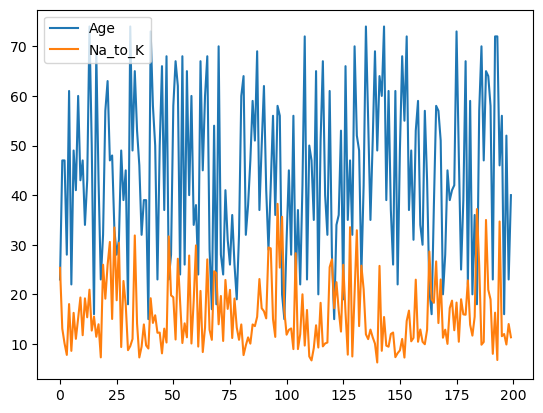

In [6]:
drug_data.plot() # Normal display of (numerical) data using plot function

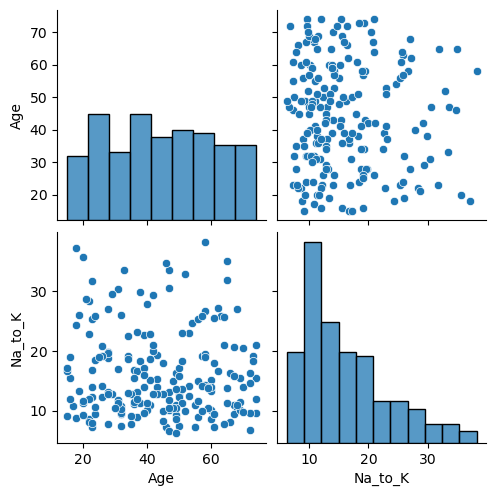

In [7]:
sb.pairplot(drug_data) # Getting pairplot for relevancy between data

## Data Splitting and Testing

In [8]:
# Assigning the training and target data into variables
X = drug_data["BP"]
Y = drug_data["Drug"]

In [9]:
# Splitting the data into training and testing variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [10]:
# Using the Vectorizer module and fitting it inside a variable to be used
feature_extraction = TfidfVectorizer(min_df= 1, lowercase=True)

In [16]:
# Converting textual data into numerical data
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.fit_transform(X_test)

Y_train_feature = feature_extraction.fit_transform(Y_train)
Y_test_feature = feature_extraction.fit_transform(Y_test)

In [17]:
# Displaying its numerical value as verification
print(X_train_feature)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 1)	1.0
  (16, 2)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 0)	1.0
  (24, 2)	1.0
  :	:
  (135, 2)	1.0
  (136, 0)	1.0
  (137, 0)	1.0
  (138, 2)	1.0
  (139, 1)	1.0
  (140, 2)	1.0
  (141, 2)	1.0
  (142, 2)	1.0
  (143, 1)	1.0
  (144, 0)	1.0
  (145, 2)	1.0
  (146, 1)	1.0
  (147, 1)	1.0
  (148, 1)	1.0
  (149, 1)	1.0
  (150, 2)	1.0
  (151, 0)	1.0
  (152, 0)	1.0
  (153, 1)	1.0
  (154, 1)	1.0
  (155, 0)	1.0
  (156, 0)	1.0
  (157, 0)	1.0
  (158, 0)	1.0
  (159, 0)	1.0


In [18]:
# Using Logistic Regression as the training model
model = LogisticRegression()
model.fit(X_train_feature, Y_train)

LogisticRegression()

## Data Evaluation

In [19]:
# Model Evaluation on training data
# Using the numerical version of the training variable as prediction tester
pred_on_training_data = model.predict(X_train_feature)
# Comparing the accuracy between the trained variable and the prediction tester
accuracy_on_training_data = accuracy_score(Y_train, pred_on_training_data)

# Displaying the results
print(f"{round(accuracy_on_training_data * 100, 1)}%")

51.2%


In [20]:
# Model Evaluation on testing data
# Same method but using test variable instead
pred_on_testing_data = model.predict(X_test_feature)
accuracy_on_testing_data = accuracy_score(Y_test, pred_on_testing_data)

print(f"{round(accuracy_on_testing_data * 100, 1)}%")

55.0%
